**Problem Statement**

We are seeking a machine learning engineer with expertise in transformers and time series data analysis and signal processing. The engineer should have a strong knowledge of machine learning and deep learning algorithms, proficiency in data preprocessing and feature engineering techniques, and experience working with time-series data analysis and signal processing. The engineer should also be familiar with data privacy and security practices, such as differential privacy. The engineer should have expertise in programming languages commonly used in ML and DL, such as Python, and frameworks like PyTorch or TensorFlow. The engineer should be proficient in data visualization and interpretation of results.

Please note that this project requires a significant level of knowledge and experience. Therefore, we kindly request that if you do not possess the required expertise or are unfamiliar with this particular subject matter, it would be best not to invest further time in this specific project.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
import os
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from numpy import array

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
df = pd.read_csv("/content/gdrive/My Drive/datasets/AAPL.csv")
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [6]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [9]:
df.shape

(1258, 15)

In [11]:
df.isna().sum()

Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

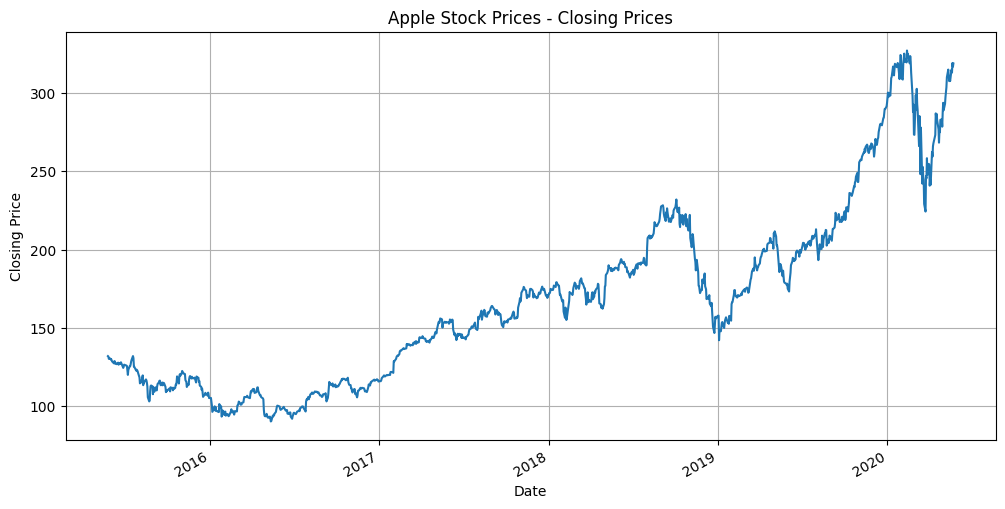

In [26]:
#Visualizing the stock prices
sample_df = df.copy()
sample_df['date'] = pd.to_datetime(sample_df['date'])
sample_df.set_index('date', inplace=True)
sample_df['close'].plot(figsize=(12, 6))
plt.title('Apple Stock Prices - Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [14]:
df1=df.reset_index()['close']
df1.shape

(1258,)

In [16]:
#Preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(1258, 1)

In [17]:
#Splitting Datasets into train and test
training_size = int(0.65*len(df1))
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]
print(train_data.shape,test_data.shape)

(817, 1) (441, 1)


In [20]:
import time
#Function to create datasets into x_train,y_train,x_test and y_test
def create_dataset(dataset,time_step):
  dataX,dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(time_step+i),0]
    dataX.append(a)
    dataY.append(dataset[time_step+i,0])
  return np.array(dataX),np.array(dataY)


In [22]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(716, 100) (716,)
(340, 100) (340,)


In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print(X_train.shape,X_test.shape)

(716, 100, 1) (340, 100, 1)


Model Building

In [29]:
#Creating the LSTM model for training
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 14s 120ms/step - loss: 0.0131 - val_loss: 0.0655
Epoch 2/100
12/12 [==============================] - 0s 25ms/step - loss: 0.0026 - val_loss: 0.0078
Epoch 3/100
12/12 [==============================] - 0s 17ms/step - loss: 0.0011 - val_loss: 0.0043
Epoch 4/100
12/12 [==============================] - 0s 17ms/step - loss: 7.5097e-04 - val_loss: 0.0054
Epoch 5/100
12/12 [==============================] - 0s 17ms/step - loss: 6.7889e-04 - val_loss: 0.0052
Epoch 6/100
12/12 [==============================] - 0s 17ms/step - loss: 6.5449e-04 - val_loss: 0.0044
Epoch 7/100
12/12 [==============================] - 0s 21ms/step - loss: 6.5291e-04 - val_loss: 0.0050
Epoch 8/100
12/12 [==============================] - 0s 21ms/step - loss: 6.3724e-04 - val_loss: 0.0056
Epoch 9/100
12/12 [==============================] - 0s 26ms/step - loss: 6.5123e-04 - val_loss: 0.0040
Epoch 10/100
12/12 [==============================] - 0s 24ms/step - loss:

In [31]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

11/11 [==============================] - 0s 8ms/step


Model Evaluation

In [33]:
print(f"MSE for train data : {math.sqrt(mean_squared_error(y_train,train_predict))}")
print(f"MSE for test data : {math.sqrt(mean_squared_error(y_test,test_predict))}")

MSE for train data : 0.011229352685999196
MSE for test data : 0.03159983487734754


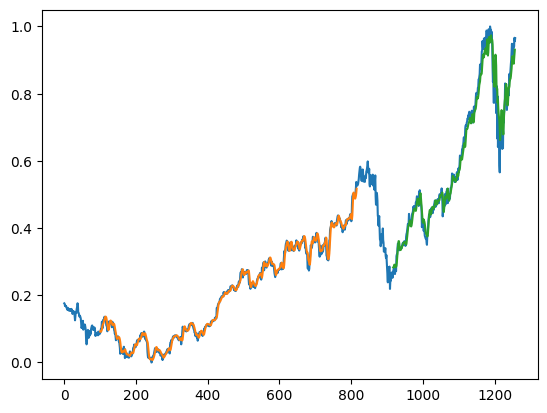

In [35]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
x_input=test_data[341:].reshape(1,-1)
print(x_input.shape)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
print(len(temp_input))

(1, 100)
100


**Forecasting for next 30 days**

In [ ]:
lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


Text(0.5, 1.0, 'Forecasted stock prices of next 30 days ')

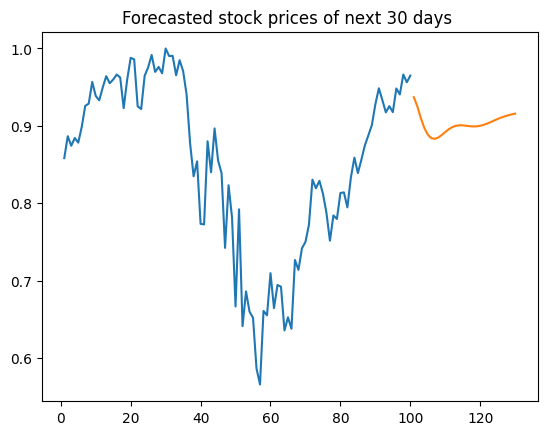

In [41]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title("Forecasted stock prices of next 30 days ")